In [34]:
import tensorflow as tf
import os

In [35]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import keras.utils
import cv2
import imghdr

In [37]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [38]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [39]:
img = cv2.imread(os.path.join('data','0.2','frame254.jpg'))
img.shape

(205, 240, 3)

In [40]:
data = keras.utils.image_dataset_from_directory('data', batch_size = 8,)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 87 files belonging to 2 classes.


In [41]:
batch[0].shape

(8, 256, 256, 3)

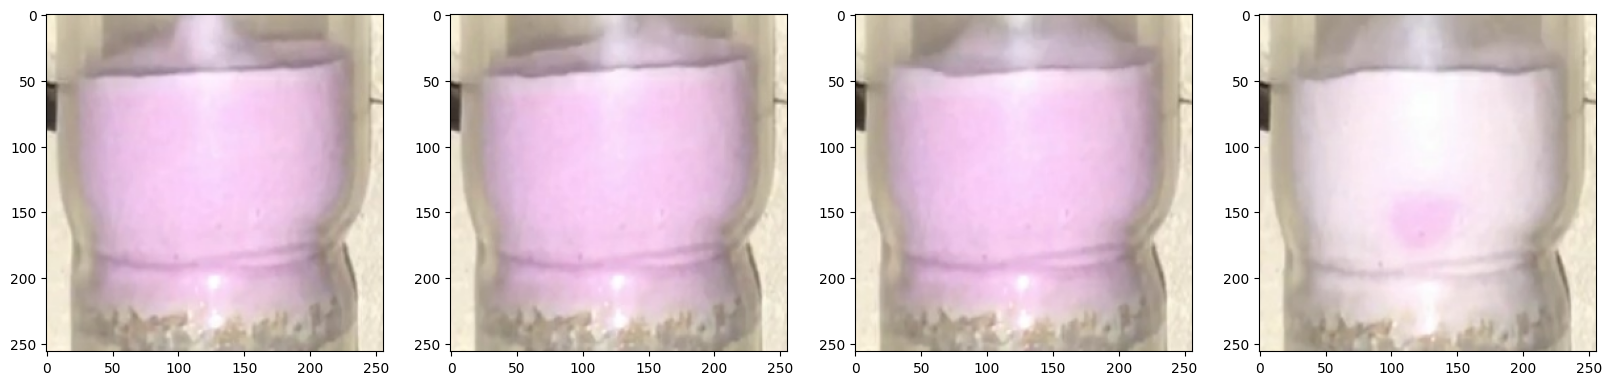

In [42]:
figs , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    

In [43]:
data = data.map(lambda x,y: (x/255, y))

In [44]:
data.as_numpy_iterator().next()

(array([[[[0.98039216, 0.9607843 , 0.84705883],
          [0.97683823, 0.9572304 , 0.8435049 ],
          [0.98308825, 0.9634804 , 0.8497549 ],
          ...,
          [0.9719363 , 0.94056374, 0.8594363 ],
          [0.96936274, 0.9379902 , 0.8634804 ],
          [0.9764706 , 0.94509804, 0.87058824]],
 
         [[0.9776425 , 0.95803463, 0.84430915],
          [0.97408855, 0.9544807 , 0.8407552 ],
          [0.9803385 , 0.9607307 , 0.8470052 ],
          ...,
          [0.98018533, 0.9488128 , 0.8676854 ],
          [0.97735405, 0.9459815 , 0.8714717 ],
          [0.98196995, 0.9505974 , 0.8760876 ]],
 
         [[0.97450215, 0.9548943 , 0.8392004 ],
          [0.9673804 , 0.94777256, 0.83207864],
          [0.97326136, 0.9536535 , 0.8379596 ],
          ...,
          [0.988253  , 0.95688045, 0.875753  ],
          [0.98807997, 0.9567074 , 0.8821976 ],
          [0.98628217, 0.9549096 , 0.8803998 ]],
 
         ...,
 
         [[0.97256434, 0.9490349 , 0.8627604 ],
          [0.96367

In [45]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [46]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))

In [50]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 3s 232ms/step - loss: 6.6394 - accuracy: 0.5179 - val_loss: 8.2600 - val_accuracy: 0.4583
Epoch 2/20
7/7 [==============================] - 1s 186ms/step - loss: 8.1692 - accuracy: 0.4643 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 1s 179ms/step - loss: 7.3523 - accuracy: 0.5179 - val_loss: 6.9892 - val_accuracy: 0.5417
Epoch 4/20
7/7 [==============================] - 1s 188ms/step - loss: 8.1692 - accuracy: 0.4643 - val_loss: 10.1662 - val_accuracy: 0.3333
Epoch 5/20
7/7 [==============================] - 1s 186ms/step - loss: 7.8969 - accuracy: 0.4821 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 1s 178ms/step - loss: 7.3523 - accuracy: 0.5179 - val_loss: 6.9892 - val_accuracy: 0.5417
Epoch 7/20
7/7 [==============================] - 1s 176ms/step - loss: 8.4415 - accuracy: 0.4464 - val_loss: 8.2600 - val_accuracy: 0.4583
Epoch 8/20
7/7 [===

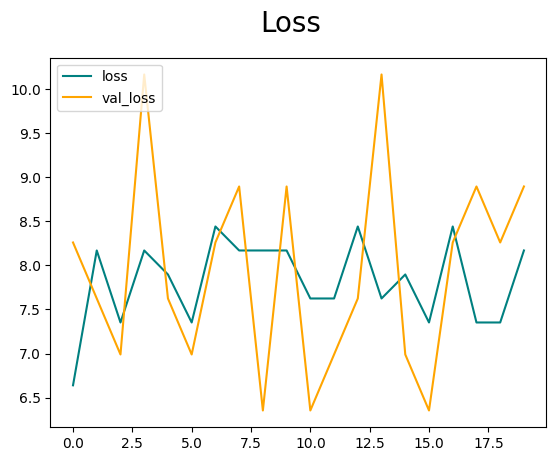

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

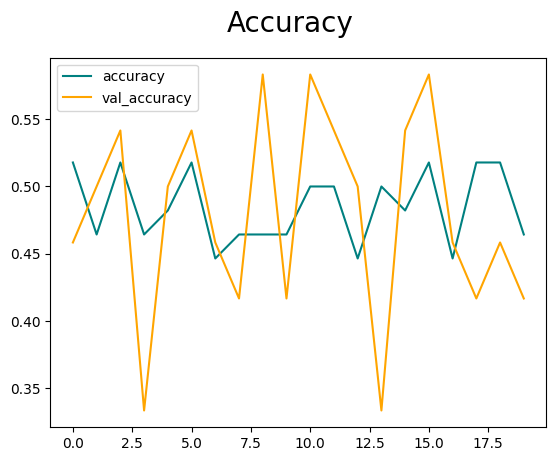

In [56]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [57]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [58]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 91ms/step
tf.Tensor(0.42857143, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.42857143, shape=(), dtype=float32)


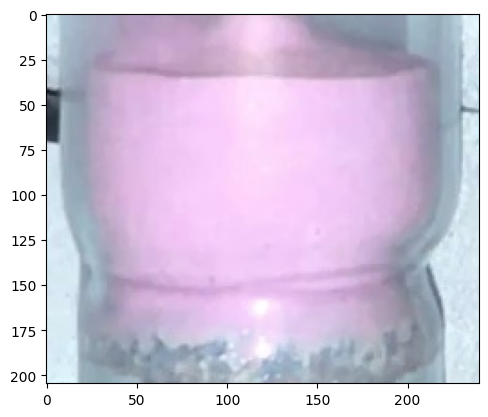

In [59]:
i=0
txt = 'source data\carbon/frame{}.jpg'
img = cv2.imread(txt.format(i))
plt.imshow(img)
plt.show()

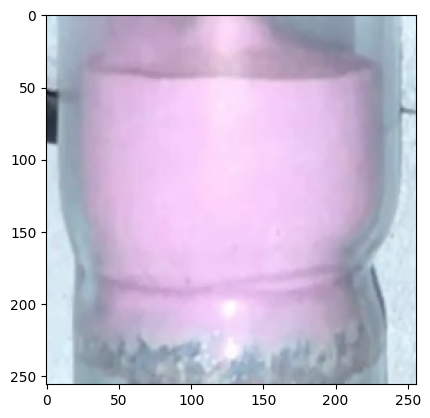

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
X = np.expand_dims(resize/255, 0)
X.shape

(1, 256, 256, 3)

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [63]:
yhat[0][0]

131.1277

In [ ]:
import glob
from skimage import io
import cv2

In [ ]:
# This part takes 1-2 mins for processing
i=0
path = 'source data\carbon/frame{}.jpg'
CNN_val = []

for i in range(1752) :
    img = cv2.imread(txt.format(i))
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    CNN_val.append(yhat[0][0])

In [ ]:
CNN_val[1499]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [ ]:
dataset = pd.read_csv('carbonData.csv')
y=dataset["CO2 conc outlet"][:1752].values.reshape(-1,1)
#x=CNN_val
x = np.array(CNN_val).reshape(-1,1)

In [ ]:
x_train[1499]

In [ ]:
x_train,x_test,y_train,y_test = x[:1500],x[1500:],y[:1500],y[1500:]

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[150]

In [ ]:
df=pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten()})

In [ ]:
df1=df.head(50)
df1.plot(kind="bar",figsize=(16,10))
plt.show()

In [ ]:
y_test[0][0]

In [ ]:
y_pred[50]